<a href="https://colab.research.google.com/github/SaurabhVaze/airline-delays/blob/main/Project_2_Part_2_Data_Cleaning_%2B_Exploratory_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set 1 (Project 2 Dataset)

In [2]:
airlines = pd.read_csv('/content/Airlines.csv')

In [3]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


1) Source of data

https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

2) Brief description of data

Dataset of different US flights used to predict whether a flight gets delayed or not.

3) What is the target?

Flight Delayed? (Y/N)

4) Is this a classification or regression problem?

This will be a classification problem 

5) How many features?

7

6) How many rows of data.

539383

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this

The lack of numerical features may limit the model's ability to predict accurately, along with a multitude of other factors that play into flight delays, which are not included in this dataset (weather, travel demand, etc.)

#Data Cleaning 

In [4]:
airlines = airlines.drop(['id', 'Flight'], axis = 1)

Drop id and Flight number columns, as they provide no benefit in training a model to predict delays

In [5]:
airlines.isna().sum() #check missing values

Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

**no missing values**

In [6]:
airlines.duplicated().sum()   #check for duplicated rows

223629

**many duplicated rows**

In [7]:
airlines = airlines.drop_duplicates()

In [8]:
airlines.duplicated().sum()   #check for duplicated rows

0

**duplicates removed**

In [9]:
dtypes = airlines.dtypes                           #find any irregularities in the entries within columns of object datatype
strings = dtypes[dtypes == 'object'].index

for c in strings:
  print(f'Column = {c}')
  print(airlines[c].value_counts(dropna = False))
  print('\n\n')

Column = Airline
WN    55951
DL    39502
OO    33830
XE    20660
UA    19046
AA    18868
EV    18685
US    16847
MQ    16719
CO    13828
9E    13826
FL    13391
B6     8446
OH     8135
YV     7006
AS     5844
F9     2956
HA     2214
Name: Airline, dtype: int64



Column = AirportFrom
ATL    22752
ORD    14613
DEN    12420
DFW    10283
IAH    10029
       ...  
SJT       10
MMH       10
GUM        7
ADK        4
ABR        2
Name: AirportFrom, Length: 293, dtype: int64



Column = AirportTo
ATL    21873
ORD    14087
DEN    12244
IAH     9934
DFW     9729
       ...  
MMH       10
PIE        9
GUM        8
ADK        2
ABR        2
Name: AirportTo, Length: 293, dtype: int64





**no irregular labels of objects**

In [10]:
airlines.describe()

,DayOfWeek,Time,Length,Delay
count,315754.000000,315754.000000,315754.000000,315754.000000
mean,3.952982,809.243544,131.145471,0.478379
std,1.968146,276.382195,69.093555,0.499533
min,1.000000,10.000000,0.000000,0.000000
25%,2.000000,575.000000,81.000000,0.000000
50%,4.000000,805.000000,115.000000,0.000000
75%,6.000000,1036.000000,160.000000,1.000000
max,7.000000,1439.000000,655.000000,1.000000


**the data seems well distributed with no obvious outliers**

In [11]:
airlines.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,SFO,IAH,3,15,205,1
1,US,PHX,CLT,3,15,222,1
2,AA,LAX,DFW,3,20,165,1
3,AA,SFO,DFW,3,20,195,1
4,AS,ANC,SEA,3,30,202,0


Text(0.5, 1.0, 'Univariate Distribution of Flight Lengths')

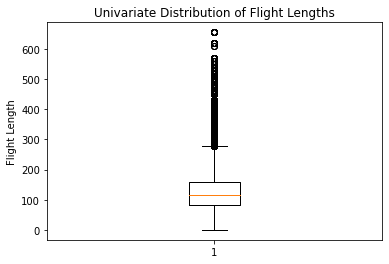

In [12]:
plt.boxplot(x='Length', data = airlines) #univariate boxplot of flight lengths
plt.ylabel('Flight Length')
plt.title('Univariate Distribution of Flight Lengths')


Text(0.5, 1.0, 'Count Distribution of Flight Times')

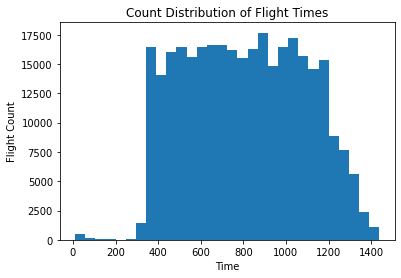

In [13]:
plt.hist('Time', data = airlines, bins = 30) #univariate plot of Time feature
plt.xlabel('Time')
plt.ylabel('Flight Count')
plt.title('Count Distribution of Flight Times')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flight Count')

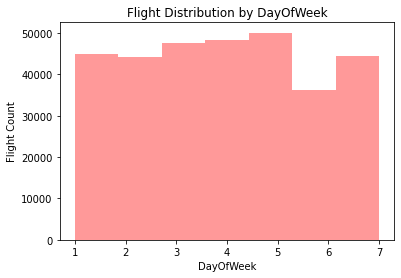

In [14]:
sns.distplot(airlines['DayOfWeek'], bins = 7, kde = False, color = 'red').set(title = 'Flight Distribution by DayOfWeek') #flight DOW distribution
plt.ylabel('Flight Count')

Text(0.5, 1.0, 'Flight On-Time Count')

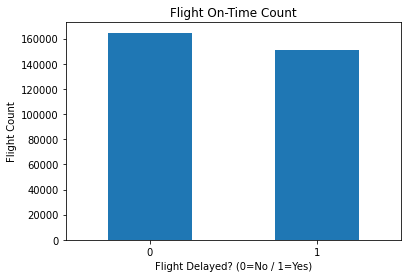

In [15]:
airlines.groupby('Delay').size().plot.bar(rot=0) #target: how many flights were on-time?
plt.xlabel('Flight Delayed? (0=No / 1=Yes)')
plt.ylabel('Flight Count')
plt.title('Flight On-Time Count')